<a href="https://colab.research.google.com/github/ahmadayoubi404/Deep-Learning/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
import matplotlib.pyplot as plt
import numpy as np

**Data Preparation**

In [4]:
data = pd.read_csv('/content/train.csv')
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [5]:
data.shape

(1000, 12)

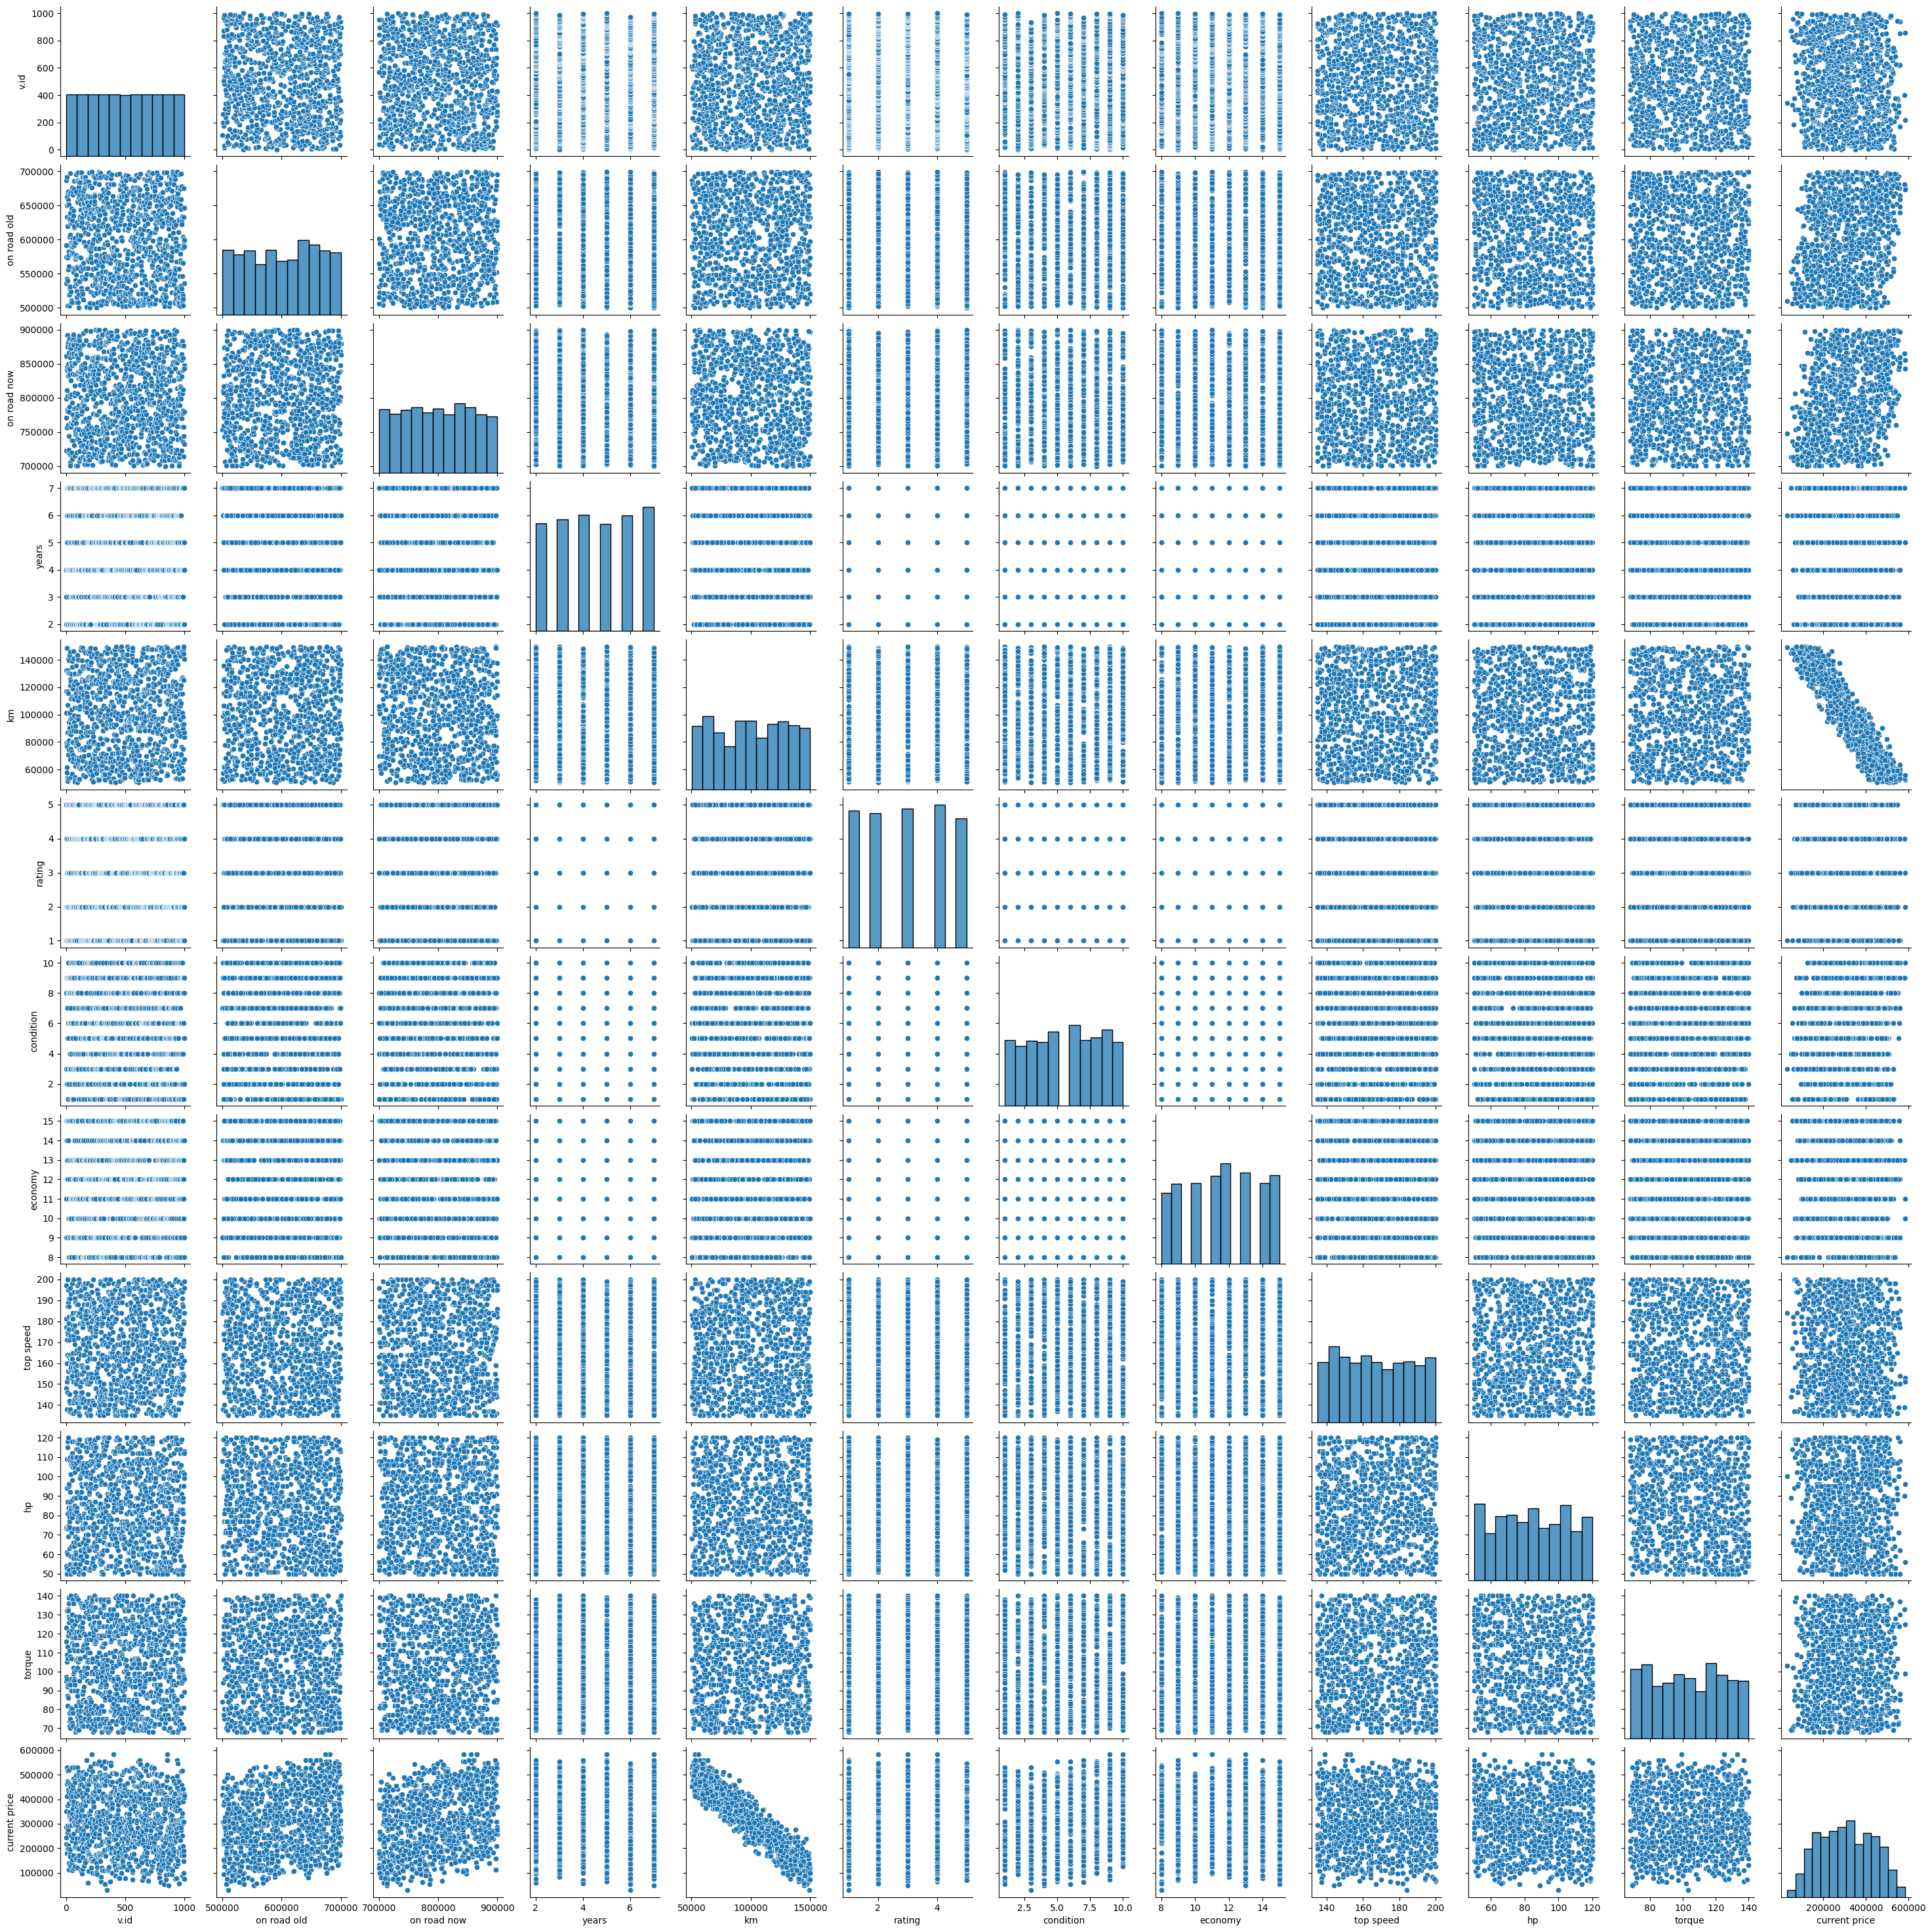

In [6]:
sns.pairplot(data)

In [7]:
dataTensor = tf.constant(data)
print(dataTensor.shape)
print(dataTensor)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [8]:
dataTensor = tf.cast(dataTensor, tf.float32) #some values are infinity because they are too large to be stored in a float16 so we use float32
print(dataTensor.shape)
print(dataTensor)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [92]:
#to avoid biases we can randomly shuffle our data
print("before shuffling")
print(dataTensor[:5]) #first 5 rows
dataTensor = tf.random.shuffle(dataTensor)
print("\nafter shuffling")
print(dataTensor[:5]) #first 5 rows

before shuffling
tf.Tensor(
[[7.570000e+02 6.338370e+05 7.764690e+05 2.000000e+00 6.466200e+04
  1.000000e+00 3.000000e+00 1.400000e+01 1.350000e+02 7.200000e+01
  1.250000e+02 4.468750e+05]
 [9.690000e+02 5.667830e+05 7.388100e+05 6.000000e+00 7.008700e+04
  3.000000e+00 1.000000e+01 1.100000e+01 1.410000e+02 1.060000e+02
  1.360000e+02 4.189340e+05]
 [6.220000e+02 6.644780e+05 8.592540e+05 4.000000e+00 6.334500e+04
  3.000000e+00 1.000000e+01 1.300000e+01 1.540000e+02 1.080000e+02
  8.800000e+01 5.583550e+05]
 [1.200000e+02 6.580160e+05 8.655970e+05 4.000000e+00 1.126970e+05
  4.000000e+00 4.000000e+00 1.100000e+01 1.420000e+02 9.900000e+01
  1.240000e+02 3.117735e+05]
 [8.100000e+01 5.958860e+05 7.526260e+05 2.000000e+00 6.256300e+04
  2.000000e+00 4.000000e+00 1.200000e+01 1.580000e+02 1.100000e+02
  1.180000e+02 4.247810e+05]], shape=(5, 12), dtype=float32)

after shuffling
tf.Tensor(
[[7.210000e+02 5.377380e+05 8.230310e+05 2.000000e+00 1.158700e+05
  3.000000e+00 6.000000e+00 1.

In [93]:
X = dataTensor[:, 3:-1] #taking all rows/samples but not all features only 8 features
print(X.shape)
print(X[:5]) #printing the first 5 rows

(1000, 8)
tf.Tensor(
[[2.00000e+00 1.15870e+05 3.00000e+00 6.00000e+00 1.20000e+01 1.37000e+02
  7.70000e+01 1.11000e+02]
 [3.00000e+00 7.27140e+04 5.00000e+00 3.00000e+00 1.20000e+01 1.51000e+02
  1.00000e+02 1.12000e+02]
 [5.00000e+00 1.22974e+05 1.00000e+00 2.00000e+00 9.00000e+00 1.93000e+02
  1.11000e+02 7.80000e+01]
 [4.00000e+00 1.30393e+05 3.00000e+00 6.00000e+00 1.40000e+01 1.95000e+02
  7.70000e+01 1.37000e+02]
 [2.00000e+00 7.49050e+04 4.00000e+00 6.00000e+00 1.30000e+01 1.69000e+02
  7.20000e+01 9.70000e+01]], shape=(5, 8), dtype=float32)


In [94]:
y = dataTensor[:, -1] #taking all rows/samples but only the last feature
print(y.shape)
print(y[:5]) #printing the first 5 rows

#making y as a column vector so that it matches the input X
y= tf.expand_dims(y, axis = -1)
print(y.shape)
print(y[:5])

(1000,)
tf.Tensor([221132.5 388376.  164382.  221781.  338141.5], shape=(5,), dtype=float32)
(1000, 1)
tf.Tensor(
[[221132.5]
 [388376. ]
 [164382. ]
 [221781. ]
 [338141.5]], shape=(5, 1), dtype=float32)


In [95]:
#normalizing the input X
normalizer = Normalization()
X_normalized = tf.constant([[3,4,5,6,7],[4,5,6,7,8]])
normalizer.adapt(X_normalized)
normalizer(X_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [96]:
#test train split
trainRatio = 0.8
valRatio = 0.1
testRatio = 0.1

X_train = X[:int(X.shape[0]*trainRatio)] #first 800 rows
y_train = y[:int(y.shape[0]*trainRatio)]
print(X_train.shape)
print(y_train.shape)

X_val = X[int(X.shape[0]*trainRatio):int(X.shape[0]*(trainRatio+valRatio))] #rows from 800 till 900
y_val = y[int(y.shape[0]*trainRatio):int(y.shape[0]*(trainRatio+valRatio))]
print(X_val.shape)
print(y_val.shape)

X_test = X[int(X.shape[0]*(trainRatio+valRatio)):] #rows from 900 till 1000
y_test = y[int(y.shape[0]*(trainRatio+valRatio)):]
print(X_test.shape)
print(y_test.shape)

(800, 8)
(800, 1)
(100, 8)
(100, 1)
(100, 8)
(100, 1)


In [97]:
print(X.shape)
#only normalize the training set
normalizer = Normalization()
normalizer.adapt(X_train)
print(normalizer(X_train)[:5])

(1000, 8)
tf.Tensor(
[[-1.4958282   0.5729355   0.0330433   0.14184861  0.16679871 -1.5474205
  -0.34890953  0.381825  ]
 [-0.9166111  -0.906058    1.4619395  -0.92535144  0.16679871 -0.8163967
   0.77149826  0.42892027]
 [ 0.24182315  0.81639576 -1.3958529  -1.2810848  -1.1856236   1.3766748
   1.3073455  -1.1723197 ]
 [-0.33739397  1.0706513   0.0330433   0.14184861  1.0684136   1.4811068
  -0.34890953  1.6063026 ]
 [-1.4958282  -0.8309705   0.7474914   0.14184861  0.61760616  0.1234911
  -0.5924764  -0.2775091 ]], shape=(5, 8), dtype=float32)


In [98]:
#Linear Regression Model using neural networks (Linear Regression = 1 Perceptron)
model = tf.keras.Sequential([
    #InputLayer(input_shape = (32, 8)),  #32 is the batch size (32 samples out of the existing 1000)
    InputLayer(input_shape = (8,)), #because we don't know the batch size yet!
    normalizer,
    Dense(1), #we have 9 trainable parameters (8 features + 1 bias)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

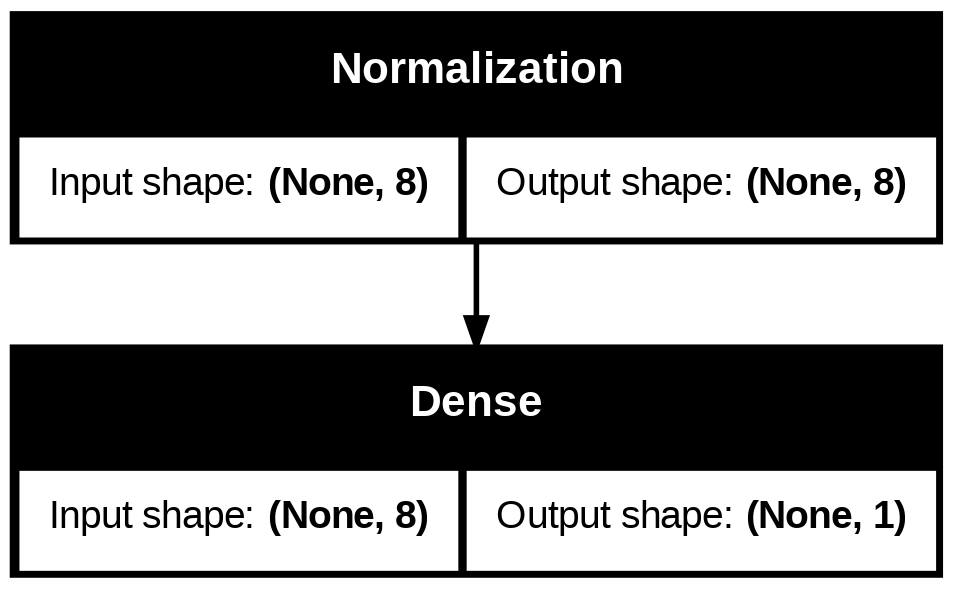

In [99]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True)

In [100]:
#error sanctioning
#model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError())
#model.compile(optimizer = 'adam', loss = 'mse') #easier
#there is also mean absolute error it is used so that large errors don't weight much so we don't square them
#mean absolute error
model.compile(optimizer = 'adam', loss = 'mae', metrics = ['root_mean_squared_error'])

#training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 1) #epochs nb of times we are gonna update the weights #verbose shows us the epoches

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 310542.5625 - root_mean_squared_error: 335722.0938 - val_loss: 314307.1875 - val_root_mean_squared_error: 337078.6875
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310043.7500 - root_mean_squared_error: 334442.9688 - val_loss: 314307.1875 - val_root_mean_squared_error: 337078.6562
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312956.8750 - root_mean_squared_error: 337773.1562 - val_loss: 314307.1250 - val_root_mean_squared_error: 337078.6562
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312337.6562 - root_mean_squared_error: 337057.9375 - val_loss: 314307.1250 - val_root_mean_squared_error: 337078.6250
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315647.5938 - root_mean_squared_error: 341278.6562 - val_loss: 314307.1250 - val_root_mean_squared_error: 337078.5625
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305171.5000 - root_mean_squared_error: 329759.8438 - val

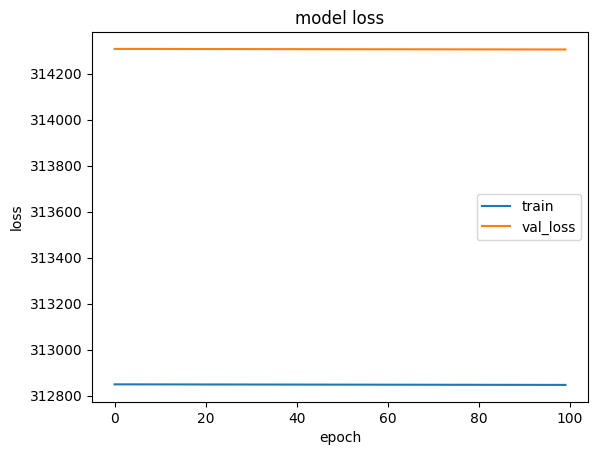

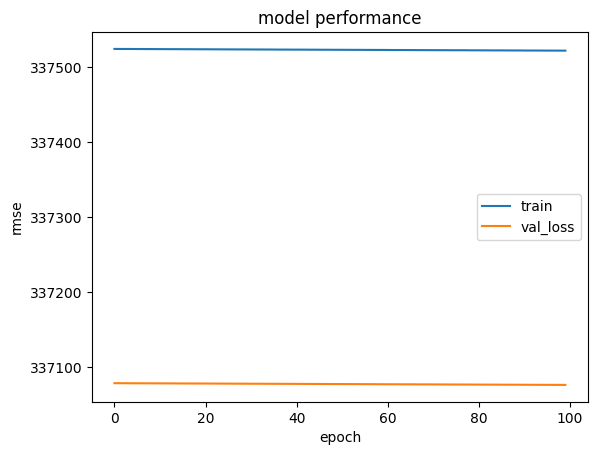

In [101]:
#plotting the loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

#plotting the root mean squared error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()


In [112]:
#evaluating
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 271496.6562 - root_mean_squared_error: 295569.3438 


[268101.59375, 292623.75]

In [113]:
print(X_test.shape)
model.predict(X_test)

(100, 8)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[ 3.8593893 ],
       [ 2.4383197 ],
       [ 1.7170682 ],
       [ 2.1466813 ],
       [ 0.88074374],
       [ 2.1309476 ],
       [ 1.3694037 ],
       [ 1.9045287 ],
       [ 3.0345302 ],
       [ 1.3871    ],
       [ 3.5083404 ],
       [ 2.3024714 ],
       [ 1.5262651 ],
       [ 2.971405  ],
       [ 1.5501052 ],
       [ 4.7184057 ],
       [ 2.0224333 ],
       [ 2.5713868 ],
       [ 3.926248  ],
       [ 1.8366388 ],
       [ 2.1233554 ],
       [ 0.93896794],
       [ 3.4474869 ],
       [ 3.4585693 ],
       [ 2.6202686 ],
       [ 3.6893058 ],
       [ 3.8307614 ],
       [ 2.3713558 ],
       [ 2.6877139 ],
       [ 3.9026623 ],
       [ 1.5803076 ],
       [ 2.2613382 ],
       [ 3.6214626 ],
       [-0.01988935],
       [ 2.3287945 ],
       [ 0.8525324 ],
       [ 2.4136136 ],
       [ 2.8761313 ],
       [ 3.3155494 ],
       [ 1.6462249 ],
       [ 1.9102964 ],
       [ 4.357215  ],
       [ 1.7913162 ],
       [ 0.80371857],
       [ 3.411705  ],
       [ 1

In [114]:
print(model.predict(tf.expand_dims(X_test[0], axis = 0)))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[3.8593893]]
tf.Tensor([314149.], shape=(1,), dtype=float32)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


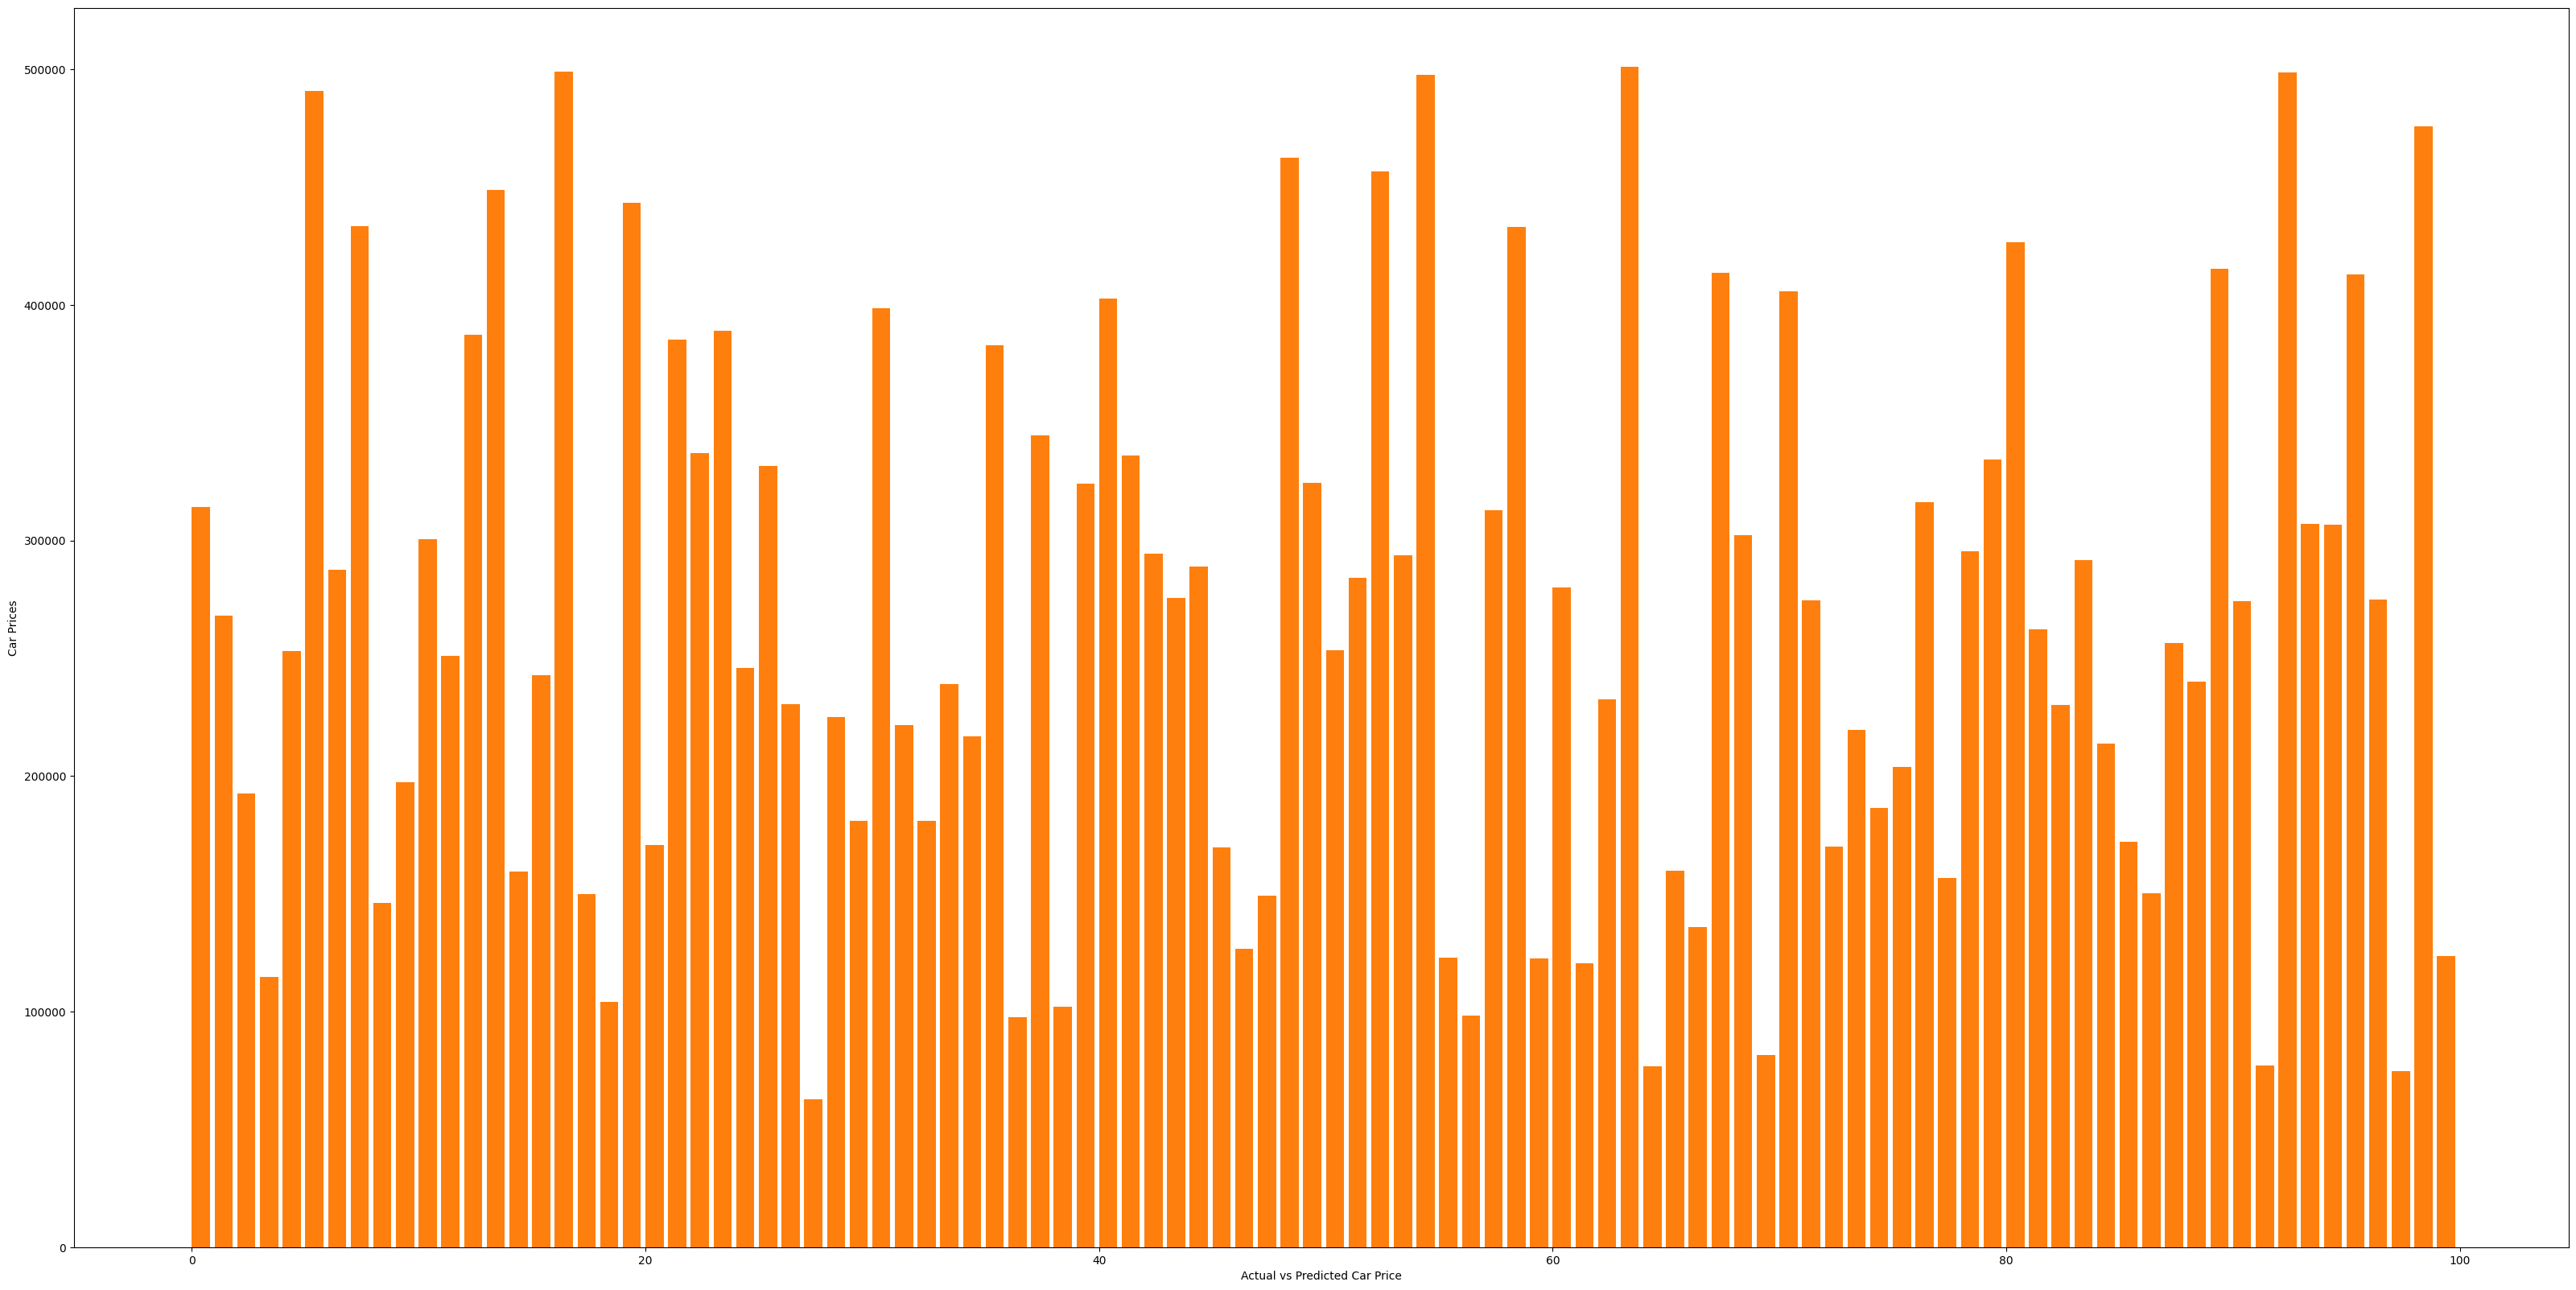

In [119]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])

ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label = 'Predicted Car Price')
plt.bar(ind + width, y_true, label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Car Price')
plt.ylabel('Car Prices')

plt.show()